# ML PROJECT

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
#load dataset
telco=pd.read_csv('telecom_churn.csv')

In [3]:
telco.head(6)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes


In [4]:
#check null value
telco.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [5]:
#Checking the data types of all the columns
telco.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [6]:
telco['TotalCharges'].value_counts()

          11
20.2      11
19.75      9
20.05      8
19.9       8
          ..
6849.4     1
692.35     1
130.15     1
3211.9     1
6844.5     1
Name: TotalCharges, Length: 6531, dtype: int64

In [7]:
# replace null vaalue in datatypes
telco['TotalCharges'].replace(" ",np.nan,inplace=True)

In [8]:
#check null value TotalCharges
telco['TotalCharges'].isnull().sum()

11

<function matplotlib.pyplot.show(close=None, block=None)>

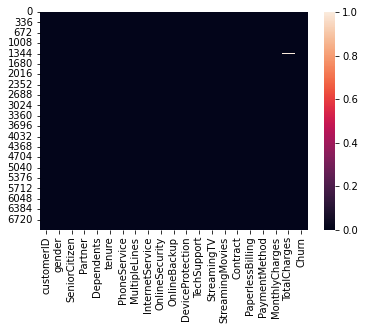

In [9]:
#visualize null value
sns.heatmap(telco.isnull())
plt.show

In [10]:
#convert datatypes TotalCharges object to float
telco['TotalCharges']=telco['TotalCharges'].astype('float')

In [11]:
#check datatypes TotalCharges
telco['TotalCharges'].dtypes

dtype('float64')

In [12]:
#fill null value TotalCharges
m=telco['TotalCharges'].mean()
telco['TotalCharges'].fillna(m,inplace=True)

In [13]:
#check null value TotalCharges
telco['TotalCharges'].isnull().sum()

0

<AxesSubplot:>

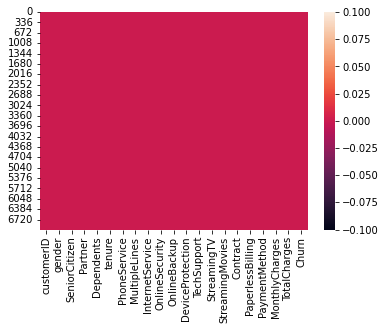

In [14]:
#visualize check null value
sns.heatmap(telco.isnull())

<AxesSubplot:>

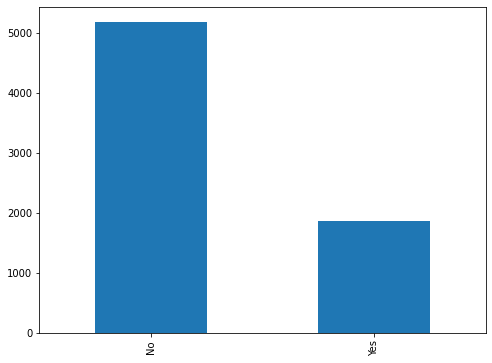

In [15]:
telco['Churn'].value_counts().plot(kind='bar', figsize=(8, 6))

In [16]:
#how many percantage 1 and 0
100*telco['Churn'].value_counts()/len(telco['Churn'])

No     73.463013
Yes    26.536987
Name: Churn, dtype: float64

In [17]:
telco['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [18]:
#REMOVE CUSTOMERID COLUMN PERMANENT
telco.drop('customerID',axis=1,inplace=True)

In [19]:
#SEPRATE ALL NUM TYPE DATA HOLD IN DF_NUM
telco_num=telco.select_dtypes(['int64','float64'])
#SEPRATE ALL OBJECT TYPE DATA HOLD IN DF_CAT
telco_cat=telco.select_dtypes(object)

In [20]:
telco_cat.dtypes

gender              object
Partner             object
Dependents          object
PhoneService        object
MultipleLines       object
InternetService     object
OnlineSecurity      object
OnlineBackup        object
DeviceProtection    object
TechSupport         object
StreamingTV         object
StreamingMovies     object
Contract            object
PaperlessBilling    object
PaymentMethod       object
Churn               object
dtype: object

In [21]:
telco_num.dtypes

SeniorCitizen       int64
tenure              int64
MonthlyCharges    float64
TotalCharges      float64
dtype: object

In [22]:
#TO CONVERT OBJECT TYPE DATA IN NUMBER USING LABELENCODER
from sklearn.preprocessing import LabelEncoder
for col in telco_cat:
 le=LabelEncoder()
 telco_cat[col]=le.fit_transform(telco_cat[col])

In [23]:
#CONCATENATE BOTH DATAFRAME TO JOIN DATAFRAME DF_NUM AND DF_CAT AND DF_NEW HOLD I
telco_new=pd.concat([telco_num,telco_cat],axis=1)

In [24]:
telco_new.dtypes

SeniorCitizen         int64
tenure                int64
MonthlyCharges      float64
TotalCharges        float64
gender                int32
Partner               int32
Dependents            int32
PhoneService          int32
MultipleLines         int32
InternetService       int32
OnlineSecurity        int32
OnlineBackup          int32
DeviceProtection      int32
TechSupport           int32
StreamingTV           int32
StreamingMovies       int32
Contract              int32
PaperlessBilling      int32
PaymentMethod         int32
Churn                 int32
dtype: object

In [26]:
telco_new.columns

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges', 'gender',
       'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')

In [27]:
#SELECT INPUT AND OUTPUT FROM DATASET
x=telco_new.drop('Churn',axis=1) #INPUT VARIABLE
y=telco_new['Churn'] #OUTPUT TARGET

In [28]:
#TRAIN TEST SPLIT
from sklearn.model_selection import train_test_split

In [29]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

In [30]:
#WORK ON STANDARDSCALER
from sklearn.preprocessing import StandardScaler
#FIT_TRANSFORM TRAING DATA X_TRAIN
#TRANSFORM USE ONLY TESTING DATA MEANS X_TEST
ss=StandardScaler()
x_train=ss.fit_transform(x_train)
x_test=ss.transform(x_test)

In [31]:
#BASE LINE MODEL MENS LOGISTICREGRESSION (WE PREDICT YES OR NO VALUE)
from sklearn.linear_model import LogisticRegression

In [32]:
#CREATE THE OBJECT LOGISTICREGRESSION
lr=LogisticRegression()

In [33]:
#TRAIN THE MODEL WITH 70% DATA
lr.fit(x_train,y_train)

LogisticRegression()

In [34]:
#TEST THE MODEL WITH 30% DATA
y_pred=lr.predict(x_test)

In [35]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [36]:
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.88      0.87      1585
           1       0.63      0.59      0.61       528

    accuracy                           0.81      2113
   macro avg       0.75      0.73      0.74      2113
weighted avg       0.81      0.81      0.81      2113

[[1401  184]
 [ 219  309]]


In [37]:
#HERE WE SAW MORE DIFFERANCE BETWEEN 0 AND 1 CLASS REASON:
#1->CAN BE DATA IS IMBALANCE

In [38]:
#FIRST CHECK DATA IS IMBALANCE OR NOT ?
telco_new['Churn'].value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

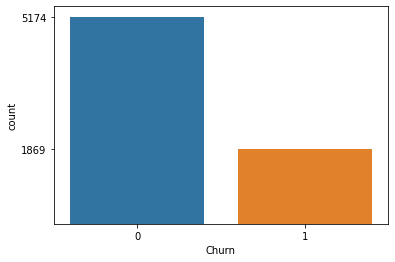

In [39]:
#VISUALIZS
sns.countplot(data=telco_new,x='Churn')
f=telco_new['Churn'].value_counts()
plt.yticks(f)
plt.show()

In [40]:
#HERE IS CLEAR UNDARSTAND DATA IS IMBALANCE
#WE HAVE TO BALANCE DATASET

In [41]:
#BEFORE APPLY RANDOMOVERSAPMLER TRAINING DATA
y_train.value_counts()

0    3589
1    1341
Name: Churn, dtype: int64

In [42]:
#APPLY RANDOMEOVERSAMPLER
#FIRST CREATE THE OBJECT OF CLASS RANDOMOVERSAMPLER
from imblearn.over_sampling import RandomOverSampler

In [43]:
#CREATE OBJECT OF RANDOMOVERSAMPLER CLASS
ros=RandomOverSampler(random_state=1)

In [44]:
#APPLY OVERSAMPLER TRAINING DATA(70%)
x_train1,y_train1=ros.fit_resample(x_train,y_train)

In [45]:
#CHECK AFTER APPLY RANDOMOVERSAMPLER
y_train1.value_counts()

0    3589
1    3589
Name: Churn, dtype: int64

In [46]:
#BEFORE APPLY RANDOMOVERSAPMLER TESTING DATA
y_test.value_counts()

0    1585
1     528
Name: Churn, dtype: int64

In [47]:
#ALSO APPLY RANDOMOVERSAMPLER TESTING DATA(30%)
x_test1,y_test1=ros.fit_resample(x_test,y_test)

In [48]:
#CHECK AFTER APLLY RANDOMOVERSAMPLER
y_test1.value_counts()

0    1585
1    1585
Name: Churn, dtype: int64

In [49]:
#CREATE A FUNCTION
def create_model(model):
 model.fit(x_train1,y_train1) #TRAIN THE MODAL
 y_pred=model.predict(x_test1) #TEST MODEL
 print(classification_report(y_test1,y_pred))
 print('confusion matrix :' )
 #CONFUSTION MATRIX
 print(confusion_matrix(y_test1,y_pred))
 return model

In [50]:
#GIVEN TRANING DATA LOGISTICREGRESSION ALGORITHEM
#CREATE LOGISTIC CLASS
lr1=LogisticRegression()

In [51]:
#CALL FUNCTION TRAIN AND TEST THE MODEL
lr1=create_model(lr1)

              precision    recall  f1-score   support

           0       0.80      0.73      0.77      1585
           1       0.75      0.82      0.79      1585

    accuracy                           0.78      3170
   macro avg       0.78      0.78      0.78      3170
weighted avg       0.78      0.78      0.78      3170

confusion matrix :
[[1162  423]
 [ 284 1301]]


In [52]:
#Note:- Here logisticregression we have to focus recall score here recall score 0 is 73 and reacll score class 1 is 82
#Let's test the data with other model(algorithem)

# DecisionTreeClassifier

In [53]:
#now perfome data set with the help of decisiontreeclassifier
from sklearn.tree import DecisionTreeClassifier

In [54]:
#create object of decisiontreeclassifier
dt=DecisionTreeClassifier()

In [55]:
#call function train and test the model
dt=create_model(dt)

              precision    recall  f1-score   support

           0       0.63      0.81      0.71      1585
           1       0.74      0.53      0.62      1585

    accuracy                           0.67      3170
   macro avg       0.69      0.67      0.67      3170
weighted avg       0.69      0.67      0.67      3170

confusion matrix :
[[1290  295]
 [ 743  842]]


In [56]:
#SHOW THE INFORMATION GAIN OF ALL INPUT FEATURES
dt.feature_importances_

array([0.01983878, 0.10922794, 0.20427666, 0.17628881, 0.02346448,
       0.01590888, 0.01824317, 0.00165554, 0.01281387, 0.00880881,
       0.04367383, 0.01849117, 0.01253436, 0.01623043, 0.00955231,
       0.01307486, 0.23017109, 0.02031482, 0.04543018])

In [57]:
#CREATE A DICT
dic={'input column':x.columns,'information gain':dt.feature_importances_}
df1=pd.DataFrame(dic)
df1.sort_values('information gain',ascending=False)

,input column,information gain
16,Contract,0.230171
2,MonthlyCharges,0.204277
3,TotalCharges,0.176289
1,tenure,0.109228
18,PaymentMethod,0.045430
10,OnlineSecurity,0.043674
4,gender,0.023464
17,PaperlessBilling,0.020315
0,SeniorCitizen,0.019839
11,OnlineBackup,0.018491


In [58]:
#CREATE A TREE
from sklearn import tree

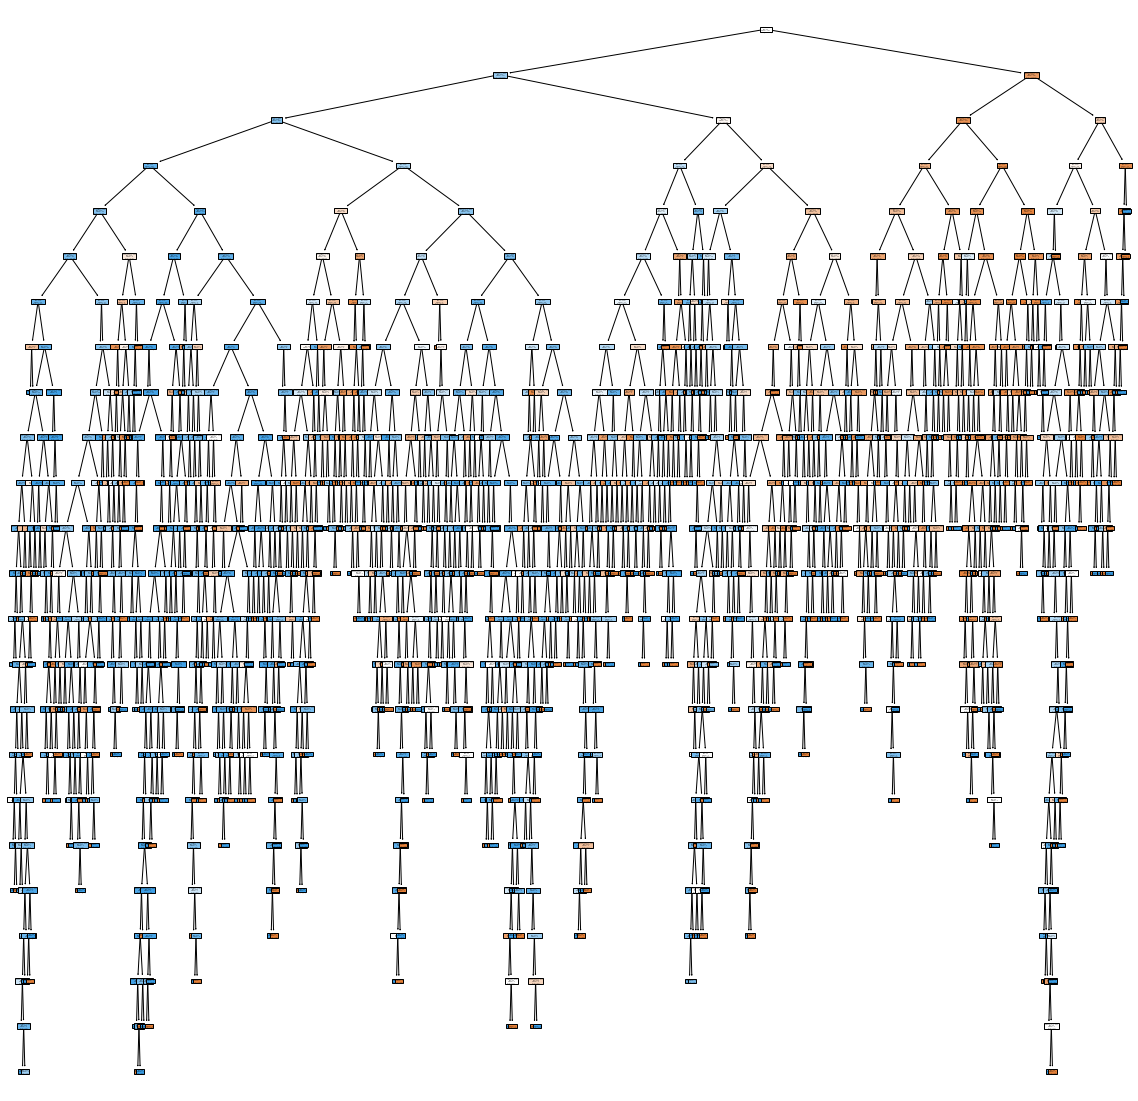

In [59]:
#SHOW THE TREE
features=x.columns
fig=plt.figure(figsize=(20,20))
_=tree.plot_tree(dt,feature_names=features,filled=True)

In [60]:
#here is clearly undrstand that the model is over fit, so reduced the overfitting
#over fiting situation by using the pruning technique
#1:-max_depth
#2:-min_samples_leaf

In [61]:
#1:- max_depth
dt1=DecisionTreeClassifier(max_depth=3,random_state=1)

In [62]:
#call function train and test the model
dt1=create_model(dt1)

              precision    recall  f1-score   support

           0       0.80      0.69      0.74      1585
           1       0.73      0.83      0.78      1585

    accuracy                           0.76      3170
   macro avg       0.77      0.76      0.76      3170
weighted avg       0.77      0.76      0.76      3170

confusion matrix :
[[1099  486]
 [ 272 1313]]


In [63]:
#CREATE A DICTIONARY CHACK INPUT COLUMN GIVE ME MORE INFORMATION
dic={'input column':x.columns,'information gain':dt1.feature_importances_}
df1=pd.DataFrame(dic)
df1.sort_values('information gain',ascending=False)

,input column,information gain
16,Contract,0.725250
10,OnlineSecurity,0.137610
1,tenure,0.074568
2,MonthlyCharges,0.045626
11,OnlineBackup,0.016946
0,SeniorCitizen,0.000000
17,PaperlessBilling,0.000000
15,StreamingMovies,0.000000
14,StreamingTV,0.000000
13,TechSupport,0.000000


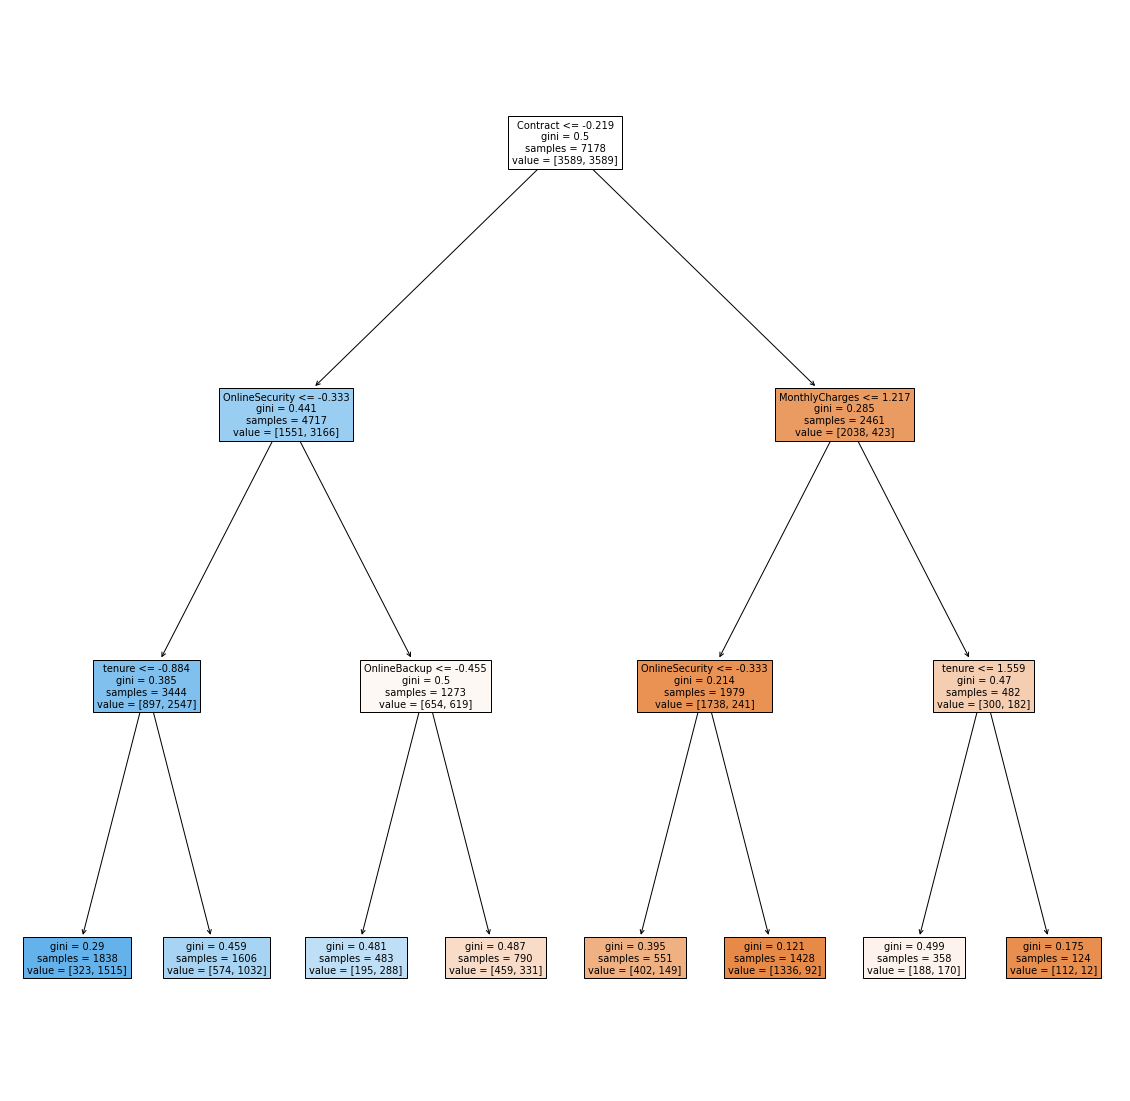

In [64]:
#SHOW THE TREE
features=x.columns
fig=plt.figure(figsize=(20,20))
_=tree.plot_tree(dt1,feature_names=features,filled=True)

In [65]:
#2:-min_samples_leaf
dt2=DecisionTreeClassifier(min_samples_leaf=70,random_state=1)

In [66]:
#call function train and test the model
dt2=create_model(dt2)

              precision    recall  f1-score   support

           0       0.77      0.74      0.75      1585
           1       0.75      0.78      0.76      1585

    accuracy                           0.76      3170
   macro avg       0.76      0.76      0.76      3170
weighted avg       0.76      0.76      0.76      3170

confusion matrix :
[[1168  417]
 [ 347 1238]]


In [67]:
#here decision tree classifier with use pruning technique max_depth give about accuracy 76
#we have focur recall score of class 0 is 69 and 1 is 83
#here decision tree classifier with use pruning technique min_depth give about accuracy 76
#we have focuse on recall score of class 0 is 0.74 and 1 is 0.78
#test data with other model

# Random Forest Classifier

In [68]:
#call random forest tree
from sklearn.ensemble import RandomForestClassifier

In [69]:
##create the object on randomforestclassifer class
rfc=RandomForestClassifier(n_estimators=15,max_features=12,random_state=1)

In [70]:
#call function train and test the model
rfc=create_model(rfc)

              precision    recall  f1-score   support

           0       0.69      0.82      0.75      1585
           1       0.78      0.64      0.70      1585

    accuracy                           0.73      3170
   macro avg       0.74      0.73      0.73      3170
weighted avg       0.74      0.73      0.73      3170

confusion matrix :
[[1301  284]
 [ 572 1013]]


In [71]:
#here random forestreeclassifier class recall o is 0.82 and 1 is 0.64 
#test data with other model

# Boosting Technique

In [72]:
#ensembling technique

In [73]:
#1. ADA boost
from sklearn.ensemble import AdaBoostClassifier

In [74]:
#create the object ADAboost
ada=AdaBoostClassifier(n_estimators=6,random_state=1)

In [75]:
#call function train and test the model
ada=create_model(ada)

              precision    recall  f1-score   support

           0       0.84      0.66      0.74      1585
           1       0.72      0.87      0.79      1585

    accuracy                           0.77      3170
   macro avg       0.78      0.77      0.76      3170
weighted avg       0.78      0.77      0.76      3170

confusion matrix :
[[1043  542]
 [ 199 1386]]


In [76]:
#2. gradientboostingclassifer
from sklearn.ensemble import GradientBoostingClassifier

In [77]:
#create the object gradientboosting
gbc=GradientBoostingClassifier(n_estimators=50,random_state=1)

In [78]:
#call function train and test the model
gbc=create_model(gbc)

              precision    recall  f1-score   support

           0       0.80      0.73      0.76      1585
           1       0.75      0.82      0.78      1585

    accuracy                           0.77      3170
   macro avg       0.78      0.77      0.77      3170
weighted avg       0.78      0.77      0.77      3170

confusion matrix :
[[1154  431]
 [ 287 1298]]


In [81]:
#3. XGB classifier
from xgboost import XGBClassifier

In [82]:
#create the object xgradient
xgb=XGBClassifier(n_estimators=8,reg_alpha=1,random_state=1)

In [83]:
#call function train and test the model
xgb=create_model(xgb)

              precision    recall  f1-score   support

           0       0.79      0.75      0.77      1585
           1       0.76      0.81      0.78      1585

    accuracy                           0.78      3170
   macro avg       0.78      0.78      0.78      3170
weighted avg       0.78      0.78      0.78      3170

confusion matrix :
[[1189  396]
 [ 309 1276]]


In [84]:
#here ADA boost give about accuracy 0.77 score but here
#we have focur recall score of class 0 is 66 and 1 is 89
#here gradient boost give about accuracy 0.77 score but here
#we have focur recall score of class 0 is 73 and 1 is 82
#here XGBgradient boost give about accuracy 0.78 score but here
#we have focur recall score of class 0 is 75 and 1 is 81
#Let's test data with other model

# K-NN(KNeighborsClassifier):

In [85]:
from sklearn.neighbors import KNeighborsClassifier

In [86]:
#create the object k-nn
knc=KNeighborsClassifier(n_neighbors=15, metric='minkowski',p=2)

In [87]:
#call function train and test the model
knc=create_model(knc)

              precision    recall  f1-score   support

           0       0.81      0.67      0.73      1585
           1       0.72      0.84      0.77      1585

    accuracy                           0.75      3170
   macro avg       0.76      0.75      0.75      3170
weighted avg       0.76      0.75      0.75      3170

confusion matrix :
[[1058  527]
 [ 252 1333]]


In [88]:
#here k-nn give about accuracy 0.75 score but here
#we have focur recall score of class 0 is 67 and 1 is 84
#Let's test data with other model

# Suport Vector Machine

In [89]:
from sklearn.svm import LinearSVC

In [90]:
#create the object svm
svc=LinearSVC(random_state=1)

In [91]:
#call function train and test the model
svc=create_model(svc)

              precision    recall  f1-score   support

           0       0.82      0.72      0.77      1585
           1       0.75      0.84      0.79      1585

    accuracy                           0.78      3170
   macro avg       0.78      0.78      0.78      3170
weighted avg       0.78      0.78      0.78      3170

confusion matrix :
[[1143  442]
 [ 259 1326]]


In [92]:
#here accuracy is 0.78 which is good but we can more better
#add some external error on trainig time object od LinerSVS

In [93]:
#create the object svm1
svc1=LinearSVC(random_state=1,C=0.7)

In [94]:
#call function train test the model
svc1=create_model(svc1)

              precision    recall  f1-score   support

           0       0.82      0.72      0.77      1585
           1       0.75      0.84      0.79      1585

    accuracy                           0.78      3170
   macro avg       0.78      0.78      0.78      3170
weighted avg       0.78      0.78      0.78      3170

confusion matrix :
[[1143  442]
 [ 259 1326]]


In [95]:
#here data is non-linear changing the value 'c' above acuracy not change
#adding external error traning time but any no changes on score
#mens data is linear if any changes then data is non-linear

In [96]:
#work on non-linear dataset
from sklearn.svm import SVC

In [97]:
#create the object poly
svc2=SVC(random_state=1,kernel='poly')

In [98]:
#call function train and test the model
svc2=create_model(svc2)

              precision    recall  f1-score   support

           0       0.78      0.74      0.76      1585
           1       0.75      0.79      0.77      1585

    accuracy                           0.77      3170
   macro avg       0.77      0.77      0.77      3170
weighted avg       0.77      0.77      0.77      3170

confusion matrix :
[[1173  412]
 [ 331 1254]]


In [99]:
#work on radial basis
svc3=SVC(random_state=1,kernel='rbf')

In [100]:
#call function train and test the model
svc3=create_model(svc3)

              precision    recall  f1-score   support

           0       0.78      0.76      0.77      1585
           1       0.76      0.78      0.77      1585

    accuracy                           0.77      3170
   macro avg       0.77      0.77      0.77      3170
weighted avg       0.77      0.77      0.77      3170

confusion matrix :
[[1197  388]
 [ 345 1240]]


In [101]:
#here poly give about accuracy 0.77 score but here
#we have focur recall score of class 0 is 0.74 and 1 is 0.79
#Let's test data with other model
#here radiel give about accuracy 0.77 score but here
#we have focur recall score of class 0 is 0.76 and 1 is 0.78
#Let's test data with other model

# Naive Bayes Classifier

In [102]:
from sklearn.naive_bayes import GaussianNB

In [103]:
#create object navie bayes classifier
gnb=GaussianNB()

In [104]:
#call function train and test the model
gnb=create_model(gnb)

              precision    recall  f1-score   support

           0       0.80      0.72      0.76      1585
           1       0.75      0.83      0.78      1585

    accuracy                           0.77      3170
   macro avg       0.78      0.77      0.77      3170
weighted avg       0.78      0.77      0.77      3170

confusion matrix :
[[1140  445]
 [ 277 1308]]


In [105]:
#here naive bayes give about accuracy 0.77 score but here
#we have focur recall score of class 0 is 0.72 and 1 is 0.83
#Let's test data with other model

In [106]:
#conclusion:- here we will recommend extreme
#ADA boost classifer algorithem for the give data for telecom_churn